In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import copy

In [2]:
class Noeud:
    
    def __init__(self, coor,name):
        self.coor = coor
        self.name=name

class Circuit:
    
    
    def __init__(self):
        self.noeuds=[]
        self.cout=0
        self.long = longevite
            
    def createWithNoeuds(self,noeuds):
        self.noeuds=noeuds
        self.updateCout()
        
    def genererCircuit(self,graphe):
        self.noeuds = graphe.noeuds
        random.shuffle(self.noeuds)
        self.updateCout()
    
    def muter(self):
        pos1 = random.randint(0,len(self.noeuds)-1)
        pos2 = random.randint(0,len(self.noeuds)-1)

        noeud1 = self.noeuds[pos1]
        noeud2 = self.noeuds[pos2]
        self.noeuds[pos1] = noeud2
        self.noeuds[pos2] = noeud1
        self.updateCout()

    def swapDoublon(self,graphe):
        myNewCircuit=[]
        needToUpdate=False
        for noeud in self.noeuds:
            if noeud not in myNewCircuit:
                myNewCircuit.append(noeud)
            else:
                noeudsNeeded=graphe.getAllNoeudNotInCircuit(myNewCircuit)
                if(len(noeudsNeeded)>0):
                    myNewCircuit.append(random.choice(noeudsNeeded))
                needToUpdate=True
        self.noeuds=myNewCircuit
        if needToUpdate:
            self.updateCout()
    
    def updateCout(self):
        newCout=0
        for i in range(len(self.noeuds)-1):
             newCout+=math.dist(self.noeuds[i].coor,self.noeuds[i+1].coor)
        newCout+=math.dist(self.noeuds[0].coor,self.noeuds[-1].coor)
        self.cout=newCout
        
    def croisement(self,circuitUseForCroisement,graphe):
        nbNoeud=len(circuitUseForCroisement.noeuds)
        randomIndex=random.randint(1,nbNoeud-1)
        tempCircuit1=self.noeuds[0:randomIndex]
        newCircuit=tempCircuit1
        for i in range(randomIndex,len(circuitUseForCroisement.noeuds)):
            addedValue=circuitUseForCroisement.noeuds[i]
            if(addedValue in newCircuit):
                addedValue=self.noeuds[i]
            newCircuit.append(circuitUseForCroisement.noeuds[i])
        myCircuitSon=Circuit()
        myCircuitSon.createWithNoeuds(newCircuit)
        myCircuitSon.swapDoublon(graphe)
        return myCircuitSon
        
    def print(self):
        string=""
        for i in range(len(self.noeuds)):
                string+=str(self.noeuds[i].name)+"->"
        string+=str(self.noeuds[0].name)
        print(string)
                
class Graphe:
    def __init__(self,noeuds):
        self.noeuds=noeuds
    def plot(self):
        for i in range(len(self.noeuds)):
            for j in range(i,len(self.noeuds)):
                
                x=[self.noeuds[i].coor[0],self.noeuds[j].coor[0]]
                y=[self.noeuds[i].coor[1],self.noeuds[j].coor[1]]
                plt.plot(x,y,marker = 'o')
                
                cout=math.dist(self.noeuds[i].coor,self.noeuds[j].coor)
        plt.show()
    def getAllNoeudNotInCircuit(self,circuit):
        result = []
        for noeud in self.noeuds:
            if noeud not in circuit:
                result.append(noeud)
        return result
            

def retirerLesPires(circuits):
    if(len(circuits)>population):
        nbARetirer=len(circuits)-population
        tempCircuit=circuits.sort(key=attrgetter('cout'))
        result=[]
        for i in range(nbARetirer,population):
            result.append(circuits[i])
        return result;

def selection_roulette(population):
        max = sum(1/chromosome.cout for chromosome in population)
        pick = random.uniform(0, max)
        current = 0
        for chromosome in population:
            current += 1/chromosome.cout
            print(current)
            if current > pick:
                return chromosome       
    
        


In [3]:
def mutation (pop):
    for i in range (nbMutation):
        tmp=random.randint(0,len(pop)-1)
        pop[tmp].muter()

def mortIndividu(pop):
    newPop = []
    for i in range (0,len(pop)):
        if (pop[i].long>0):
            newPop.append(pop[i])
    return newPop

In [4]:
longevite = 5
nbVille = 5
population = 5
croisementParCycle = 6
cycleMax=10000
nbMutation = 3

Hello World!


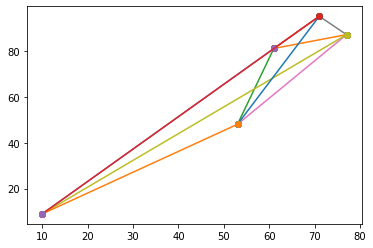

In [5]:
def main():
    print("Hello World!")
    listNoeuds=[]
    listCircuit=[]
    for i in range(nbVille):
        randX=random.randint(1,100)
        randY=random.randint(1,100)
        noeud=Noeud([randX,randY],i)
        listNoeuds.append(noeud)
    myGraphe=Graphe(listNoeuds)
    myGraphe.plot()
    for i in range(population):
        myRandomCircuit=Circuit()
        myRandomCircuit.genererCircuit(myGraphe)
        copyOfCircuit=copy.deepcopy(myRandomCircuit)
        listCircuit.append(copyOfCircuit)

        # On Mute, on Croise, On reture pire, on supprime longeivité
        
if __name__ == "__main__":
    main()